In [1]:
import pandas as pd
from collections import Counter
FILE = 'Tabelle_MagLoad_mod.csv'

In [2]:
df = pd.read_csv(FILE)
col = 'second_phase'
grain_size_median = df['grain_size'].median()
df['grain_size_bin'] = pd.qcut(df['grain_size'], 2, labels=[0,1])


In [3]:
df.columns

Index(['Materials', 'Prozessbedingung', 'homogenized_temperature',
       'homogenized_time', 'solutionized_temperature', 'solutionized_time',
       'extrution_temperature', 'extrution_speed', 'extrusion_ratio',
       'ECAE_temperature', 'ECAE_pass', 'Fe', 'Cu', 'Ni', 'Nd', 'Zn', 'Ca',
       'Al', 'Sn', 'Mn', 'Si', 'Gd', 'Y', 'Zr', 'grain_size',
       'grain_size_error', 'second_phase', 'second_phase_error', 'vpd',
       'grain_size_bin'],
      dtype='object')

In [4]:
df['Prozessbedingung'].value_counts()

Prozessbedingung
extruded        43
as-cast         23
heat-treated    13
ECAE             2
Name: count, dtype: int64

In [5]:
columns = ['homogenized_temperature',
       'homogenized_time', 'solutionized_temperature', 'solutionized_time',
       'extrution_temperature', 'extrution_speed', 'extrusion_ratio',
       'ECAE_temperature', 'ECAE_pass']

final_dict = {'process': list(df['Prozessbedingung'].unique()),
              'total': [len(df.loc[df['Prozessbedingung']==pro]) for pro in list(df['Prozessbedingung'].unique())]}

cols_list = {}

for pro in df['Prozessbedingung'].unique(): 
    df_filtered = df.loc[df['Prozessbedingung']==pro]
    cols_list.update({pro:dict(df_filtered.isna().sum())})

for col in columns:
    l = []
    for pro in df['Prozessbedingung'].unique(): 
        l.append(cols_list[pro][col])
    final_dict.update({f'{col}_nan': l})   
        

print(cols_list)
df_count = pd.DataFrame(final_dict)

latex_table = df_count.to_latex()


{'extruded': {'Materials': 0, 'Prozessbedingung': 0, 'homogenized_temperature': 28, 'homogenized_time': 28, 'solutionized_temperature': 9, 'solutionized_time': 9, 'extrution_temperature': 0, 'extrution_speed': 0, 'extrusion_ratio': 0, 'ECAE_temperature': 43, 'ECAE_pass': 43, 'Fe': 0, 'Cu': 0, 'Ni': 0, 'Nd': 0, 'Zn': 0, 'Ca': 0, 'Al': 0, 'Sn': 0, 'Mn': 0, 'Si': 0, 'Gd': 0, 'Y': 0, 'Zr': 0, 'grain_size': 0, 'grain_size_error': 4, 'second_phase': 0, 'second_phase_error': 0, 'vpd': 0, 'grain_size_bin': 0}, 'heat-treated': {'Materials': 0, 'Prozessbedingung': 0, 'homogenized_temperature': 7, 'homogenized_time': 7, 'solutionized_temperature': 0, 'solutionized_time': 0, 'extrution_temperature': 13, 'extrution_speed': 13, 'extrusion_ratio': 13, 'ECAE_temperature': 13, 'ECAE_pass': 13, 'Fe': 0, 'Cu': 0, 'Ni': 0, 'Nd': 0, 'Zn': 0, 'Ca': 0, 'Al': 0, 'Sn': 0, 'Mn': 0, 'Si': 0, 'Gd': 0, 'Y': 0, 'Zr': 0, 'grain_size': 0, 'grain_size_error': 0, 'second_phase': 0, 'second_phase_error': 0, 'vpd': 0, 'g

In [6]:
latex_table

'\\begin{tabular}{llrrrrrrrrrr}\n\\toprule\n & process & total & homogenized_temperature_nan & homogenized_time_nan & solutionized_temperature_nan & solutionized_time_nan & extrution_temperature_nan & extrution_speed_nan & extrusion_ratio_nan & ECAE_temperature_nan & ECAE_pass_nan \\\\\n\\midrule\n0 & extruded & 43 & 28 & 28 & 9 & 9 & 0 & 0 & 0 & 43 & 43 \\\\\n1 & heat-treated & 13 & 7 & 7 & 0 & 0 & 13 & 13 & 13 & 13 & 13 \\\\\n2 & as-cast & 23 & 23 & 23 & 23 & 23 & 23 & 23 & 23 & 23 & 23 \\\\\n3 & ECAE & 2 & 0 & 0 & 2 & 2 & 0 & 0 & 0 & 0 & 0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [7]:
df_filtered = df.loc[df['Prozessbedingung'] == 'extruded']


extruded
heat-treated
as-cast
ECAE


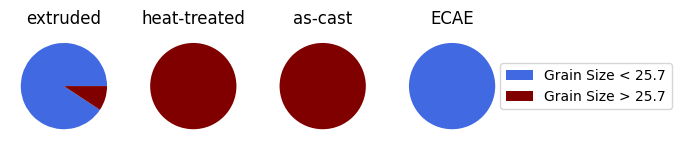

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

processes = df['Prozessbedingung'].unique()
fig, axes = plt.subplots(1, len(processes))
colors = ['royalblue', 'maroon']

grain_size_median = df['grain_size'].median()
df['grain_size_bin'] = pd.qcut(df['grain_size'], 2, labels=[0,1])

for process, ax in zip(processes, axes.flatten()):
    print(process)
    df_filtered = df.loc[df['Prozessbedingung'] == process]
    c = Counter(df_filtered['grain_size_bin'])
    for y in [0,1]:
        if y not in list(c.keys()):
            c.update({y:0})
    c = dict(sorted(c.items()))
    labels = list(c.keys())
    sizes = list(c.values())

    ax.set_title(process)
    ax.pie(sizes,
           #labels = labels,
           #autopct='%1.1f%%',
           colors = colors,
           )
    
legend_labels = [f'Grain Size < {grain_size_median}', f'Grain Size > {grain_size_median}']  # Change these labels according to your data
plt.legend(legend_labels, loc='center right', bbox_to_anchor=(2.6, 0.5))

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_HEREON(df, col, split, binwidth = 30):

    processes = list(df['Prozessbedingung'].unique())
    processes.append('all')
    fig, axes = plt.subplots(len(processes), 2, 
                            tight_layout = True,
                            figsize = (4,6)
                            )
    colors = ['royalblue', 'maroon']

    df[f'{col}_bin_{split}'] = [int(i > split) for i in df[col]]

    for i, process in enumerate(processes):
        if process == 'all':
            df_filtered = df
        else:
            df_filtered = df.loc[df['Prozessbedingung'] == process]
        c = Counter(df_filtered[f'{col}_bin_{split}'])
        for y in [0,1]:
            if y not in list(c.keys()):
                c.update({y:0})
        c = dict(sorted(c.items()))
        labels = list(c.keys())
        sizes = list(c.values())

        #axes[i][0].set_title(f'{process} n = {len(df_filtered)}')
        axes[i][0].pie(sizes,
            #labels = labels,
            #autopct='%1.1f%%',
            colors = colors,
            )
        x, y , _ = axes[i][1].hist(df_filtered[col],
                                   bins=range(int(min(df[col])), int(max(df[col])) + binwidth, binwidth))
        axes[i][1].set_xlim(min(df[col])-5, max(df[col])+5)
        axes[i][1].set_ylim(0, x.max() *1.2)
        axes[i][1].vlines(split,0, x.max() *1.2, colors = 'red')

        y_text = f'{process}'
        text_position = -0.2
        axes[i][0].text(text_position, 0.5, y_text, transform=axes[i][0].transAxes, fontsize=11,
            rotation=90, ha='center', va='center')
        
        y_text2 = f'n = {len(df_filtered)}'
        axes[i][0].text(text_position * 0.2, 0.5, y_text2, transform=axes[i][0].transAxes, fontsize=8,
            rotation=90, ha='center', va='center')
        
    legend_labels = [f'{col} < {split}', f'Grain Size > {split}']  # Change these labels according to your data
    #plt.legend(legend_labels, loc='center right', bbox_to_anchor=(2.6, 0.5))
    #plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

    #fig.suptitle(f'{col} Analysis (split: {split})')
    fig.savefig(f'{col}_Analysis.pdf')

    plt.plot()
    return df

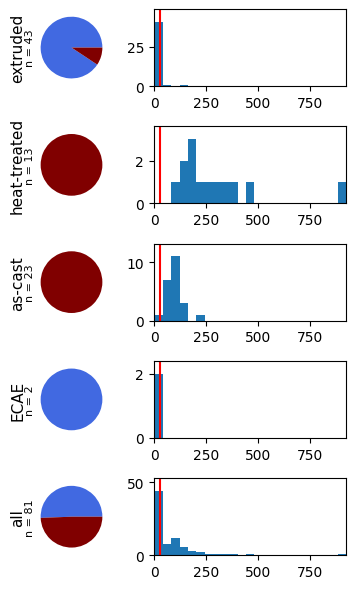

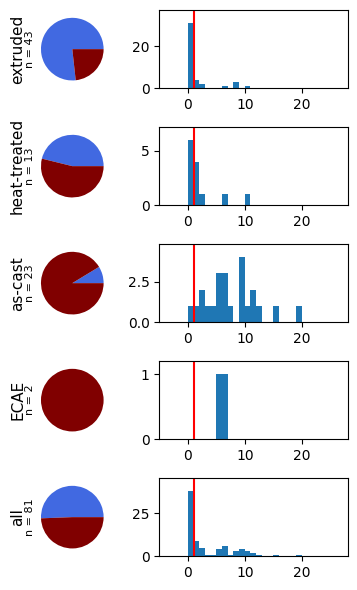

In [10]:
COL = 'grain_size'
df = plot_HEREON(df, COL, df[COL].median(), binwidth=40)

COL = 'grain_size_error'
#df = plot_HEREON(df, COL, df[COL].median())

COL = 'second_phase'
df = plot_HEREON(df, COL, df[COL].median(), binwidth=1)

COL = 'second_phase_error'
#df = plot_HEREON(df, COL, df[COL].median())

<AxesSubplot: >

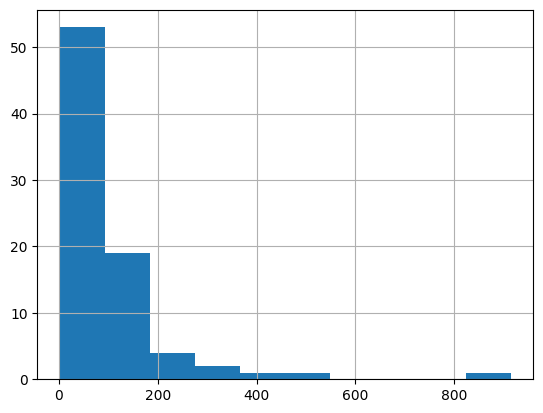

In [11]:
df['grain_size'].hist()

In [12]:
def concentration_string(df:pd.DataFrame):
    all_strings = []
    for _, row in df.iterrows():
        string = []
        for el in ['Fe', 'Cu', 'Ni', 'Nd', 'Zn', 'Ca','Al', 'Sn', 'Mn', 'Si', 'Gd', 'Y', 'Zr']:
            string.append(f'{row[el]} {el}')
        all_strings.append(', '.join(string))
    df['concentration_string'] = all_strings       
    return df
df = concentration_string(df)
df['concentration_string']

0     0.0015 Fe, 0.0001 Cu, 0.0002 Ni, 0.0 Nd, 0.0 Z...
1     0.0082 Fe, 0.0019 Cu, 0.0003 Ni, 0.68 Nd, 0.0 ...
2     0.0026 Fe, 0.0021 Cu, 0.0011 Ni, 2.39 Nd, 0.0 ...
3     0.016 Fe, 0.0024 Cu, 0.0038 Ni, 4.2 Nd, 0.0 Zn...
4     0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...
                            ...                        
76    0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...
77    0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...
78    0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...
79    0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 0.0 Zn, 0.0 Ca...
80    0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 0.0 Zn, 0.0 Ca...
Name: concentration_string, Length: 81, dtype: object

In [13]:
for col in df.columns:
    nan_count = df[col].isna().sum()
    print(col, nan_count)

Materials 0
Prozessbedingung 0
homogenized_temperature 58
homogenized_time 58
solutionized_temperature 34
solutionized_time 34
extrution_temperature 36
extrution_speed 36
extrusion_ratio 36
ECAE_temperature 79
ECAE_pass 79
Fe 0
Cu 0
Ni 0
Nd 0
Zn 0
Ca 0
Al 0
Sn 0
Mn 0
Si 0
Gd 0
Y 0
Zr 0
grain_size 0
grain_size_error 4
second_phase 0
second_phase_error 0
vpd 0
grain_size_bin 0
grain_size_bin_25.7 0
second_phase_bin_1.14 0
concentration_string 0


In [14]:
def format_query(df:pd.DataFrame):
    TEMPLATE = "A alloy witht the following paramters; {proccess}, homogenized temperature {homo_temp}, homogenized time {homo_time}, solutionized time {sol_time}, solutized temperature {sol_temp}, extrusion temperature {ext_temp}, extrusion speed {ext_speed}, extrusion ratio {ext_ratio}, concentrations {concentrations}"
    all = []
    for i, entry in df.iterrows():
        string = TEMPLATE.format(
            proccess= entry['Prozessbedingung'],
            homo_temp = entry['homogenized_temperature'],
            homo_time = entry['homogenized_time'],
            sol_time = entry['solutionized_time'], 
            sol_temp = entry['solutionized_temperature'],
            ext_temp = entry['extrution_temperature'],
            ext_speed = entry['extrution_speed'], 
            ext_ratio = entry['extrusion_ratio'],
            concentrations = entry['concentration_string']
            )
        all.append(string)
    df['total_string'] = all
    return df
df = format_query(df)

In [15]:
df['grain_size_bin'] = pd.qcut(df['grain_size'], 2, labels=[0,1])

df['grain_size_bin']

0     1
1     0
2     0
3     0
4     1
     ..
76    0
77    0
78    0
79    1
80    1
Name: grain_size_bin, Length: 81, dtype: category
Categories (2, int64): [0 < 1]

In [16]:
df.to_csv('HEREON_final.csv')

## Only extruded

In [17]:
df_extruded = df.loc[df['Prozessbedingung'] == 'extruded']
print(len(df_extruded))
df_extruded['grain_size_bin'] = pd.qcut(df_extruded['grain_size'], 2, labels=[0,1])
df_extruded['second_phase_bin'] = pd.qcut(df_extruded['second_phase'], 2, labels=[0,1])


df_extruded.to_csv('HEREON_extruded_final.csv')


43


/tmp/ipykernel_3179729/380970034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extruded['grain_size_bin'] = pd.qcut(df_extruded['grain_size'], 2, labels=[0,1])
/tmp/ipykernel_3179729/380970034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extruded['second_phase_bin'] = pd.qcut(df_extruded['second_phase'], 2, labels=[0,1])


In [18]:
df_extruded.columns

Index(['Materials', 'Prozessbedingung', 'homogenized_temperature',
       'homogenized_time', 'solutionized_temperature', 'solutionized_time',
       'extrution_temperature', 'extrution_speed', 'extrusion_ratio',
       'ECAE_temperature', 'ECAE_pass', 'Fe', 'Cu', 'Ni', 'Nd', 'Zn', 'Ca',
       'Al', 'Sn', 'Mn', 'Si', 'Gd', 'Y', 'Zr', 'grain_size',
       'grain_size_error', 'second_phase', 'second_phase_error', 'vpd',
       'grain_size_bin', 'grain_size_bin_25.7', 'second_phase_bin_1.14',
       'concentration_string', 'total_string', 'second_phase_bin'],
      dtype='object')

In [19]:
print(df['Prozessbedingung'].unique())

['extruded' 'heat-treated' 'as-cast' 'ECAE']


In [20]:
df_extruded

,Materials,Prozessbedingung,homogenized_temperature,homogenized_time,solutionized_temperature,solutionized_time,extrution_temperature,extrution_speed,extrusion_ratio,ECAE_temperature,...,grain_size_error,second_phase,second_phase_error,vpd,grain_size_bin,grain_size_bin_25.7,second_phase_bin_1.14,concentration_string,total_string,second_phase_bin
0,Mg,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,76.00,0.00,0.00,0,1,1,0,"0.0015 Fe, 0.0001 Cu, 0.0002 Ni, 0.0 Nd, 0.0 Z...",A alloy witht the following paramters; extrude...,0
1,Mg-0.5Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,9.80,0.50,1.00,60,1,0,0,"0.0082 Fe, 0.0019 Cu, 0.0003 Ni, 0.68 Nd, 0.0 ...",A alloy witht the following paramters; extrude...,0
2,Mg-2Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,8.00,1.40,0.20,60,1,0,1,"0.0026 Fe, 0.0021 Cu, 0.0011 Ni, 2.39 Nd, 0.0 ...",A alloy witht the following paramters; extrude...,1
3,Mg-5Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,3.60,10.30,1.00,60,0,0,1,"0.016 Fe, 0.0024 Cu, 0.0038 Ni, 4.2 Nd, 0.0 Zn...",A alloy witht the following paramters; extrude...,1
10,Mg-2Zn,extruded,315.0,48.0,315.0,5.0,300.0,1.00,12.0,NaN,...,2.72,0.02,0.00,550,1,0,0,"0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,0
11,Mg-2Zn-0.1Cu,extruded,435.0,48.0,435.0,5.0,300.0,1.00,12.0,NaN,...,2.57,0.44,0.00,680,0,0,0,"0.0 Fe, 0.1 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,0
12,Mg-2Zn-0.3Cu,extruded,435.0,48.0,435.0,5.0,300.0,1.00,12.0,NaN,...,2.21,1.12,0.00,680,0,0,0,"0.0 Fe, 0.3 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,1
13,Mg-2Zn-0.5Cu,extruded,435.0,48.0,435.0,5.0,300.0,1.00,12.0,NaN,...,1.55,1.58,0.00,680,0,0,1,"0.0 Fe, 0.5 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,1
14,Mg-2Zn-1Cu,extruded,435.0,48.0,435.0,5.0,300.0,1.00,12.0,NaN,...,2.01,2.14,0.00,680,0,0,1,"0.0 Fe, 1.0 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,1
15,Mg-2Zn-3Cu,extruded,435.0,48.0,435.0,5.0,300.0,1.00,12.0,NaN,...,1.06,8.54,0.00,680,0,0,1,"0.0 Fe, 3.0 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...,1


In [21]:
df_extruded = df.loc[df['Prozessbedingung'] == 'ECAE']
df_extruded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 33 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Materials                 2 non-null      object  
 1   Prozessbedingung          2 non-null      object  
 2   homogenized_temperature   2 non-null      float64 
 3   homogenized_time          2 non-null      float64 
 4   solutionized_temperature  0 non-null      float64 
 5   solutionized_time         0 non-null      float64 
 6   extrution_temperature     2 non-null      float64 
 7   extrution_speed           2 non-null      float64 
 8   extrusion_ratio           2 non-null      float64 
 9   ECAE_temperature          2 non-null      float64 
 10  ECAE_pass                 2 non-null      float64 
 11  Fe                        2 non-null      float64 
 12  Cu                        2 non-null      float64 
 13  Ni                        2 non-null      float64 
 14  N

In [22]:
df

,Materials,Prozessbedingung,homogenized_temperature,homogenized_time,solutionized_temperature,solutionized_time,extrution_temperature,extrution_speed,extrusion_ratio,ECAE_temperature,...,grain_size,grain_size_error,second_phase,second_phase_error,vpd,grain_size_bin,grain_size_bin_25.7,second_phase_bin_1.14,concentration_string,total_string
0,Mg,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,131.40,76.00,0.00,0.00,0,1,1,0,"0.0015 Fe, 0.0001 Cu, 0.0002 Ni, 0.0 Nd, 0.0 Z...",A alloy witht the following paramters; extrude...
1,Mg-0.5Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,24.70,9.80,0.50,1.00,60,0,0,0,"0.0082 Fe, 0.0019 Cu, 0.0003 Ni, 0.68 Nd, 0.0 ...",A alloy witht the following paramters; extrude...
2,Mg-2Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,19.80,8.00,1.40,0.20,60,0,0,1,"0.0026 Fe, 0.0021 Cu, 0.0011 Ni, 2.39 Nd, 0.0 ...",A alloy witht the following paramters; extrude...
3,Mg-5Nd,extruded,440.0,0.5,NaN,NaN,450.0,0.60,63.0,NaN,...,9.50,3.60,10.30,1.00,60,0,0,1,"0.016 Fe, 0.0024 Cu, 0.0038 Ni, 4.2 Nd, 0.0 Zn...",A alloy witht the following paramters; extrude...
4,Mg-2Zn,heat-treated,315.0,48.0,315.0,5.0,NaN,NaN,NaN,NaN,...,914.27,191.11,0.06,0.00,550,1,1,0,"0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 2.0 Zn, 0.0 Ca...",A alloy witht the following paramters; heat-tr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Mg-10Gd,extruded,NaN,NaN,525.0,8.0,450.0,12.50,25.0,NaN,...,11.70,0.00,0.73,0.25,?,0,0,0,"0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...",A alloy witht the following paramters; extrude...
77,Mg-10Gd,extruded,NaN,NaN,525.0,8.0,450.0,20.00,25.0,NaN,...,18.60,0.00,0.93,0.33,?,0,0,0,"0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...",A alloy witht the following paramters; extrude...
78,Mg-10Gd,extruded,NaN,NaN,525.0,8.0,450.0,40.00,25.0,NaN,...,25.70,0.00,0.38,0.15,?,0,0,0,"0.0119 Fe, 0.0007 Cu, 0.0013 Ni, 0.0 Nd, 0.0 Z...",A alloy witht the following paramters; extrude...
79,Mg-5Gd,extruded,NaN,NaN,525.0,6.0,400.0,0.70,84.0,NaN,...,51.78,10.91,0.25,0.03,?,1,1,0,"0.0 Fe, 0.0 Cu, 0.0 Ni, 0.0 Nd, 0.0 Zn, 0.0 Ca...",A alloy witht the following paramters; extrude...
